# Linear and Logistic regression assignment

## Business Understanding

## Data understanding

In [55]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
data = real_estate_valuation.data.original


In [56]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Data preparation

In [57]:

X = data.drop(columns=['Y house price of unit area'])
y = data['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Modeling

In [58]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Evaluation

MAE: 5.418035098629064
RMSE: 7.389313951469226
R2: 0.6745228670350835
b0 (intercept): -12824.25656992802
Coefficients:
No                                         -0.005617
X1 transaction date                         5.407435
X2 house age                               -0.267828
X3 distance to the nearest MRT station     -0.004815
X4 number of convenience stores             1.081144
X5 latitude                               226.048799
X6 longitude                              -30.125491
dtype: float64
First 5 predictions: [47.04645871 40.40783016 43.37463978 39.20600382 26.62817953]
First 5 actual values: [45.1 42.3 52.2 37.3 22.8]


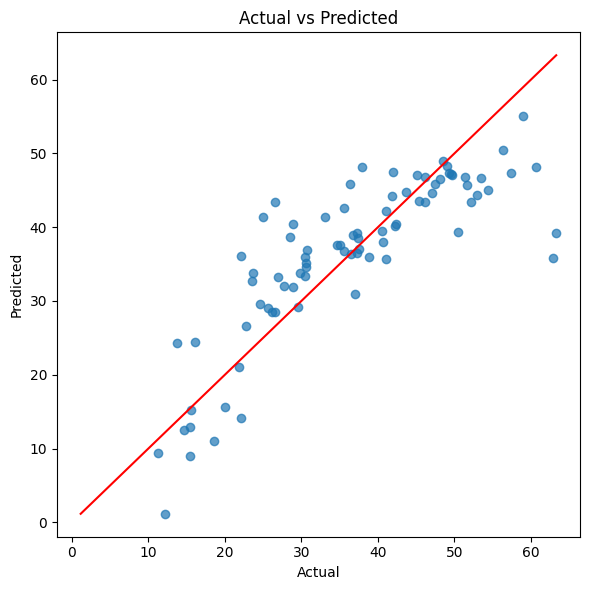

In [59]:

y_pred = linearRegressionModel.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
# Intercept + coefficients (mapped to feature names)
b0 = float(linearRegressionModel.intercept_)
coefs = pd.Series(linearRegressionModel.coef_, index=X_train.columns)

print("b0 (intercept):", b0)
print("Coefficients:")
print(coefs)

# Predictions (proof it predicts)
print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.values[:5])

# Valid plot for multivariate regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()



## Deployment